# <font color = "Purple"> Flood prediction project
 This  project is intended to predict the occurrence of flood in a particular area

##### <font color = 'purple'> Import  necessary libaries

In [252]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split



##### <font color = 'purple'> define folder path

In [253]:
data_path = '../data'
model_path = '../model'
notebook_path = '../notebook'
visual_path = '../visual'
out_path = '../output'

##### <font color = 'purple'>load dataset

os.getcwd()

In [254]:
os.chdir(data_path)

In [255]:
os.getcwd()

'C:\\Users\\Hp\\PycharmProjects\\pythonProject1\\githubprojects\\data'

In [256]:
flood_data = pd.read_csv('Flood.csv')
flood_data.head() 

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [257]:
flood_data.shape

(20544, 19)

In [258]:
 flood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

##### <font color = 'purple'> Highlights from the dataset
- The target data column was wrongly coded with a question mark and has a huge amount of missing values of more than half the entries 
- The data set has double index

In [259]:
 flood_data.describe()

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
count,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,4493.000000
mean,10271.500000,1985.332944,6.500000,33.450739,21.166872,198.776621,79.497375,1.415049,3.485827,6.419056,41935.098131,549703.189176,579280.955958,23.326647,90.493193,13.357477,1985.397944,0.919653
std,5930.686301,17.610799,3.452137,2.956401,4.949587,240.693197,7.667925,1.042454,2.083791,1.747959,36.516932,116032.076255,130616.053201,1.155241,1.108720,13.529530,17.610832,0.271860
min,0.000000,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,1948.010000,0.000000
25%,5135.750000,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.600000,4.965517,41909.000000,435303.700000,504500.300000,22.640000,89.550000,4.000000,1972.050000,1.000000
50%,10271.500000,1987.000000,6.500000,33.900000,23.400000,111.000000,81.000000,1.200000,3.300000,6.800000,41941.000000,540098.600000,561770.300000,23.170000,90.410000,7.000000,1987.040000,1.000000
75%,15407.250000,2000.000000,9.250000,35.400000,25.400000,312.000000,85.000000,1.900000,5.500000,7.800000,41963.000000,650012.100000,687095.900000,24.290000,91.460000,19.000000,2000.092500,1.000000
max,20543.000000,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,2013.120000,1.000000


##### <font color = 'purple'> check for missing values

In [260]:
 flood_data.isnull().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

##### <font color = 'purple'> checking for duplicates

In [261]:
 flood_data.duplicated().sum()

0

##### <font color = 'purple'> renaming target column

In [262]:
 flood_data.rename(columns= {"Flood?":"Flood"}, inplace = True)

##### <font color = 'purple'> dropping the the SI column

In [263]:

flood_data.drop(columns = 'Sl',inplace = True)
flood_data.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


##### <font color = 'purple'> checking my target columns

In [264]:
 flood_data.Flood.unique()

array([nan,  1.,  0.])

In [265]:
 flood_data.Flood.value_counts()

Flood
1.0    4132
0.0     361
Name: count, dtype: int64

#### <font color = 'purple'> Highlights
- The columns station name ,station number, X_cor , Y_cor latitude and longitude columns feels necessary to this data because it shows me the location , however X_cor ,Y_cor ,long and lat gives more details on the information about the particular degrees


#### <font color = 'purple'>missing data correction

- I wont be using df.dropna(Inplace= True) method because more than 50% of my data is missing, hence more than half of the entire dataset will be gone. Building any model with this type of dataset will be bias. I will be splitting the dataset into two- those with missing and no_ missing data. Using the former, i will build a modl that will be used to predict the missing occurences in the latter.

#### <font color = 'purple'> splitting the dataset

In [266]:
# getting the entire  missing data

In [267]:
 flood_data.isnull()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
20541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
20542,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [268]:
# getting the column missing

In [269]:
 flood_data.Flood.isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
20539    False
20540     True
20541     True
20542     True
20543     True
Name: Flood, Length: 20544, dtype: bool

In [270]:
# defining the missing data

In [271]:
flood_nan =  flood_data[flood_data.Flood.isnull()]
flood_nan

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,Teknaf,2013,4,33.1,24.2,34.0,77.0,4.400000,1.7,9.100000,41998,734765.4,308914.1,20.87,92.26,4,2013.04,NaN
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,NaN


In [272]:
flood_nan.Flood.isnull().sum()

16051

#### <font color = 'purple'> defining data without mising values
- This is the dataset i will be working with

In [273]:
flood_data_wo_nan =flood_data[flood_data.Flood >= 0]
flood_data_wo_nan.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1.0
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1.0


In [274]:
flood_data_wo_nan.duplicated().sum()

0

In [275]:
flood_data_wo_nan.columns

Index(['Station_Names', 'Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period', 'Flood'],
      dtype='object')

In [276]:
# selecting my numerical data

In [277]:
num_col = ['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']

In [278]:
num_data_wo_nan = flood_data_wo_nan[num_col]
num_data_wo_nan.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06
6,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07
7,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08
16,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05
17,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06


In [279]:
# scaling the data

In [280]:
scaler = StandardScaler()
scaler

StandardScaler()

In [281]:
scaler.fit(num_data_wo_nan)

StandardScaler()

In [282]:
flood_num = scaler.transform(num_data_wo_nan)
flood_num


array([[-2.12738759, -0.65784914,  0.20896186, ..., -0.26439744,
        -0.66526027, -2.12803286],
       [-2.12738759, -0.11936924, -0.33753409, ..., -0.26439744,
        -0.66526027, -2.12746395],
       [-2.12738759,  0.41911066, -0.28288449, ..., -0.26439744,
        -0.66526027, -2.12689503],
       ...,
       [ 1.51373782, -0.65784914, -0.44683328, ...,  1.43522629,
        -0.66526027,  1.51300738],
       [ 1.51373782, -0.11936924, -0.99332923, ...,  1.43522629,
        -0.66526027,  1.5135763 ],
       [ 1.51373782,  0.41911066, -0.82938044, ...,  1.43522629,
        -0.66526027,  1.51414521]])

In [283]:
#converting scaled data back to dataframe

In [284]:
flood_num_data = pd.DataFrame(flood_num, columns =num_col)

flood_num_data.head()


,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,-2.127388,-0.657849,0.208962,0.417086,-0.051602,-1.012157,-0.143749,0.031604,-0.454178,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.128033
1,-2.127388,-0.119369,-0.337534,0.454643,0.180575,-0.068584,-0.198412,-0.107633,-0.682760,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.127464
2,-2.127388,0.419111,-0.282884,0.417086,-0.652311,0.120131,-0.413750,0.031604,-0.317321,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.126895
3,-2.070495,-1.196329,1.138005,0.341973,-1.617869,-1.389587,-0.079148,-0.525344,1.581216,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.071711
4,-2.070495,-0.657849,-0.064286,0.529757,-0.184274,0.308846,-0.143749,1.145502,-0.454178,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.071142


In [285]:
# selecting categorical data

In [286]:
cat_data_wo_nan = flood_data_wo_nan['Station_Names']
cat_data_wo_nan.head() 

5     Barisal
6     Barisal
7     Barisal
16    Barisal
17    Barisal
Name: Station_Names, dtype: object

In [287]:
cat_data_wo_nan = flood_data_wo_nan[['Station_Names']]
cat_data_wo_nan.head() 

,Station_Names
5,Barisal
6,Barisal
7,Barisal
16,Barisal
17,Barisal


In [288]:
# encoding categorical data

In [289]:

onehot  = OneHotEncoder(sparse_output= False).set_output(transform='pandas')
onehot

OneHotEncoder(sparse_output=False)

In [290]:
onehot.fit(cat_data_wo_nan)


OneHotEncoder(sparse_output=False)

In [291]:
flood_cat_data = onehot.transform(cat_data_wo_nan)
flood_cat_data.head()

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
# selecting target column

In [293]:
target_col = ['Flood']

In [294]:
flood_target = flood_data_wo_nan[target_col]
flood_target

,Flood
5,1.0
6,1.0
7,1.0
16,1.0
17,1.0
...,...
20528,1.0
20536,1.0
20537,1.0
20538,1.0


In [295]:
flood_target = flood_target.reset_index(drop=True)
flood_target

,Flood
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4488,1.0
4489,1.0
4490,1.0
4491,1.0


In [296]:
flood_cat_data = flood_cat_data.reset_index(drop=True)
flood_cat_data

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [297]:
#  concatenate transformed data

In [298]:
flood_transformed =pd.concat([flood_cat_data,flood_num_data,flood_target],axis=1)

In [299]:
flood_transformed.head()

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031604,-0.454178,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.128033,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.107633,-0.682760,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.127464,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031604,-0.317321,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.126895,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.525344,1.581216,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.071711,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.145502,-0.454178,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.071142,1.0


#### <font color = "Purple">Test_train_split

In [300]:
# convert my transformed data to array

In [301]:
flood_transformed_array = flood_transformed.values
flood_transformed_array

array([[ 1.        ,  0.        ,  0.        , ..., -0.66526027,
        -2.12803286,  1.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.66526027,
        -2.12746395,  1.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.66526027,
        -2.12689503,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.66526027,
         1.51300738,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.66526027,
         1.5135763 ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.66526027,
         1.51414521,  1.        ]])

In [302]:
# defining X

In [303]:
X =flood_transformed_array[:, :-1]

In [304]:
#defining y

In [305]:
y=flood_transformed_array[:, -1]

In [306]:
seed = 10
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 ,random_state = seed)

#### <font color = "Purple"> train the model

In [307]:
f_log_reg = LogisticRegression()
f_log_reg

LogisticRegression()

In [308]:
f_log_reg.fit(X_train,y_train)

LogisticRegression()

#### <font color = "Purple"> predictions with the model


In [309]:
y_pred = f_log_reg.predict(X_test)
y_pred[:10]

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [310]:
# compare with the ground truth

In [311]:
y_test [:10]

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [312]:
y_pred[:10]==y_test [:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [313]:
# scoring model

In [314]:
score = f_log_reg.score(X_test,y_test )
score

0.996662958843159

In [315]:
# model is f_log_reg

In [316]:
f_log_reg

LogisticRegression()

#### <font color = 'Purple'> Highlights
- Using the f_log_reg model,I can predict the dataset with mising values, I will be repeating all preprocessing steps on the dataset with mising values as I did with the dataset used in building the model

In [317]:
# uploading my data that will be predicted

In [318]:
flood_nan.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [319]:
flood_nan.columns

Index(['Station_Names', 'Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period', 'Flood'],
      dtype='object')

In [320]:
# selecting numerical columns and data

In [321]:
f_num_col = ['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']

In [322]:
num_data_with_nan = flood_nan[f_num_col]
num_data_with_nan.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05


In [323]:
#scaling data

In [324]:
scaler.fit(num_data_with_nan)

StandardScaler()

In [325]:
num_data_with_nan= scaler.transform(num_data_with_nan)
num_data_with_nan

array([[-2.04654902, -1.41089609, -1.22261424, ..., -0.07963227,
        -0.69969723, -2.04958434],
       [-2.04654902, -1.14458817,  0.19097477, ..., -0.07963227,
        -0.69969723, -2.04901642],
       [-2.04654902, -0.87828024,  1.07054126, ..., -0.07963227,
        -0.69969723, -2.04844849],
       ...,
       [ 1.58810579,  0.98587522, -0.06032994, ...,  1.64477973,
        -0.69969723,  1.59022879],
       [ 1.58810579,  1.25218314, -0.24880848, ...,  1.64477973,
        -0.69969723,  1.59079671],
       [ 1.58810579,  1.51849106, -1.0655488 , ...,  1.64477973,
        -0.69969723,  1.59136463]])

In [326]:
# converting  transformed dataset array to dataframe

In [327]:
num_data_with_nan = pd.DataFrame(num_data_with_nan, columns =f_num_col)
num_data_with_nan.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,-2.046549,-1.410896,-1.222614,-1.576316,-0.870106,-1.328129,-0.860081,-1.242539,0.621269,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.049584
1,-2.046549,-1.144588,0.190975,-0.998314,-0.797042,-2.001941,-0.653491,-1.080942,0.939887,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.049016
2,-2.046549,-0.878280,1.070541,-0.001758,-0.805160,-2.540990,-0.225423,-0.757748,0.819177,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.048448
3,-2.046549,-0.611972,0.190975,0.735693,0.266442,-0.923842,0.465070,0.535029,0.876725,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.047881
4,-2.046549,-0.345664,0.724997,0.954936,0.891543,-0.250031,0.396207,0.642761,0.103340,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.047313


In [328]:
# selecting categorical columns and data

In [329]:
f_cat_col=['Station_Names']

In [330]:
cat_data_with_nan = flood_nan[f_cat_col ]
cat_data_with_nan.head() 

,Station_Names
0,Barisal
1,Barisal
2,Barisal
3,Barisal
4,Barisal


In [331]:
# encoding  categorical data

In [332]:
onehot.fit(cat_data_with_nan)

OneHotEncoder(sparse_output=False)

In [333]:
cat_data_with_nan= onehot.transform(cat_data_with_nan)
cat_data_with_nan

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [334]:
#  selecting target data

In [335]:
target_col=['Flood']

In [336]:
f_target = flood_nan[target_col]
f_target

,Flood
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
20535,NaN
20540,NaN
20541,NaN
20542,NaN


In [337]:
cat_data_with_nan = cat_data_with_nan.reset_index(drop=True)
cat_data_with_nan

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [338]:
# concatenate numerical and categorical data 

In [339]:
flood_transformed_nan =pd.concat([cat_data_with_nan,num_data_with_nan],axis=1)
flood_transformed_nan

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.860081,-1.242539,0.621269,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.049584
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.653491,-1.080942,0.939887,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.049016
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.225423,-0.757748,0.819177,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.048448
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.465070,0.535029,0.876725,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.047881
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.396207,0.642761,0.103340,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.047313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.106066,-0.650016,1.457815,1.784340,1.648853,-2.146181,-2.200297,1.644780,-0.699697,1.586821
16047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.699024,1.720075,-1.774678,1.784340,1.648853,-2.146181,-2.200297,1.644780,-0.699697,1.589661
16048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196509,0.804358,-0.851108,1.784340,1.648853,-2.146181,-2.200297,1.644780,-0.699697,1.590229
16049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794497,-0.650016,0.996031,1.784340,1.648853,-2.146181,-2.200297,1.644780,-0.699697,1.590797


#### <font color = "Purple">predicting my target column(NAN) in  my test data using my log_reg model 

In [340]:
test_predict = f_log_reg.predict(flood_transformed_nan)
test_predict

C:\Users\Hp\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

In [341]:
# convert predicted value to dataframe

In [342]:
flood_pred = pd.DataFrame(test_predict,columns=['Flood'])
flood_pred

,Flood
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
16046,1.0
16047,1.0
16048,1.0
16049,1.0


In [343]:
# seeing the distribution

In [344]:
flood_pred.value_counts()

Flood
1.0      16017
0.0         34
Name: count, dtype: int64

In [345]:
flood_pred.reset_index(drop=True)

,Flood
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
16046,1.0
16047,1.0
16048,1.0
16049,1.0


In [346]:
flood_pred.isna().sum()

Flood    0
dtype: int64

#### <font color = "Purple">  replace my flood predicted values in the flood_nan data

In [347]:
flood_nan

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,Teknaf,2013,4,33.1,24.2,34.0,77.0,4.400000,1.7,9.100000,41998,734765.4,308914.1,20.87,92.26,4,2013.04,NaN
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,NaN


In [348]:
flood_nan.loc[flood_nan['Flood'].isna(),'Flood']=test_predict

In [349]:
flood_nan

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,1.0
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,1.0
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,1.0
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,1.0
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,Teknaf,2013,4,33.1,24.2,34.0,77.0,4.400000,1.7,9.100000,41998,734765.4,308914.1,20.87,92.26,4,2013.04,1.0
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,1.0
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,1.0
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,1.0


In [350]:
flood_nan.isna().sum()

Station_Names        0
Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
Station_Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
Flood                0
dtype: int64

In [351]:
# concatenating my full complete data set

In [352]:
cleaned_flood_data = pd.concat([flood_data_wo_nan,flood_nan],axis = 0)
cleaned_flood_data

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.70,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.70,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.70,90.36,4,1949.08,1.0
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1950.05,1.0
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.70,90.36,4,1950.06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,Teknaf,2013,4,33.1,24.2,34.0,77.0,4.400000,1.7,9.100000,41998,734765.4,308914.1,20.87,92.26,4,2013.04,1.0
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,1.0
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,1.0
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,1.0


In [353]:
cleaned_flood_data.isna().sum()

Station_Names        0
Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
Station_Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
Flood                0
dtype: int64

#### <font color = "Purple"> My new work data is cleaned_flood_data

In [354]:
cleaned_flood_data.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1.0
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1.0


#### <font color = "Purple">  identification of data imbalance

In [355]:
cleaned_flood_data.Flood.unique()

array([1., 0.])

In [356]:
cleaned_flood_data.Flood.value_counts()

Flood
1.0    20149
0.0      395
Name: count, dtype: int64

#### This target column is bias as 1 has a total count of  20149 while 0 has a count of 395

##### <font color = "Purple"> resolving data imbalance by SMOTE-ENN

In [357]:
# import library

In [358]:
from imblearn.combine import SMOTEENN

In [359]:
feat_cols = [
    'Station_Names',
 'Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period'
]

targ_col = ['Flood']

In [360]:
# Select the numerical and categorical from the features dataset

In [361]:
# Selecting Numerical Columns

In [362]:
num_data = cleaned_flood_data[['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period']]
num_data.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06
6,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07
7,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08
16,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05
17,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06


In [363]:
# scaling my numerical data

In [364]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder

In [365]:
scaler = StandardScaler()
min_max = MinMaxScaler()
norm = Normalizer()

In [366]:
num = num_data.copy()

In [367]:
num = scaler.fit_transform(num)
num = min_max.fit_transform(num)
num = norm.fit_transform(num)
num

array([[0.00742647, 0.21941839, 0.27584026, ..., 0.23483698, 0.03064892,
        0.00778462],
       [0.00731663, 0.25940787, 0.25052933, ..., 0.23136378, 0.03019563,
        0.00774253],
       [0.00719845, 0.29775415, 0.24857154, ..., 0.22762672, 0.0297079 ,
        0.00768933],
       ...,
       [0.3517315 , 0.28778032, 0.18057644, ..., 0.3517315 , 0.02233216,
        0.35162346],
       [0.35868935, 0.32608123, 0.1745408 , ..., 0.35868935, 0.02277393,
        0.35863426],
       [0.36546501, 0.36546501, 0.13541784, ..., 0.36546501, 0.02320413,
        0.36546501]])

In [368]:
num_df = pd.DataFrame(num, columns=num_data.columns)
num_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0.007426,0.219418,0.275840,0.429820,0.119282,0.352463,0.070317,0.342182,0.178709,0.316026,0.352669,0.291494,0.182140,0.234837,0.030649,0.007785
1,0.007317,0.259408,0.250529,0.425634,0.131978,0.384994,0.066682,0.325081,0.161624,0.311352,0.347453,0.287183,0.179446,0.231364,0.030196,0.007743
2,0.007198,0.297754,0.248572,0.416623,0.078811,0.386203,0.055548,0.331676,0.181730,0.306323,0.341841,0.282544,0.176548,0.227627,0.029708,0.007689
3,0.014783,0.174709,0.311005,0.423410,0.020173,0.335552,0.073084,0.291919,0.307785,0.314539,0.351010,0.290123,0.181283,0.233732,0.030505,0.015053
4,0.014063,0.207753,0.250973,0.413229,0.104999,0.384507,0.066578,0.416557,0.169208,0.299224,0.333919,0.275996,0.172456,0.222352,0.029019,0.014390


In [369]:
# encoding and reseting my categorical data

In [370]:
one_hot = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
one_hot

OneHotEncoder(sparse_output=False)

In [371]:
cat_data = cleaned_flood_data[['Station_Names']]
cat_data.head()

,Station_Names
5,Barisal
6,Barisal
7,Barisal
16,Barisal
17,Barisal


In [372]:
cat_df = one_hot.fit_transform(cat_data)
cat_df = cat_df.reset_index(drop=True)
cat_df.head()

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [373]:
# reseting my target index

In [374]:
target_df = cleaned_flood_data[targ_col]
target_df = target_df.reset_index(drop=True)
target_df.head()

,Flood
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [375]:
# concatenating all  preproceesed data set

In [376]:
cleaned_df_smotenn = pd.concat([num_df, cat_df, target_df], axis=1)
cleaned_df_smotenn.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,0.007426,0.219418,0.275840,0.429820,0.119282,0.352463,0.070317,0.342182,0.178709,0.316026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.007317,0.259408,0.250529,0.425634,0.131978,0.384994,0.066682,0.325081,0.161624,0.311352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.007198,0.297754,0.248572,0.416623,0.078811,0.386203,0.055548,0.331676,0.181730,0.306323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.014783,0.174709,0.311005,0.423410,0.020173,0.335552,0.073084,0.291919,0.307785,0.314539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.014063,0.207753,0.250973,0.413229,0.104999,0.384507,0.066578,0.416557,0.169208,0.299224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [377]:
#Selection of features and Target for smotenn strategy

In [378]:
list(cleaned_df_smotenn.columns)

['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period',
 'Station_Names_Barisal',
 'Station_Names_Bhola',
 'Station_Names_Bogra',
 'Station_Names_Chandpur',
 'Station_Names_Chittagong (City-Ambagan)',
 'Station_Names_Chittagong (IAP-Patenga)',
 'Station_Names_Comilla',
 "Station_Names_Cox's Bazar",
 'Station_Names_Dhaka',
 'Station_Names_Dinajpur',
 'Station_Names_Faridpur',
 'Station_Names_Feni',
 'Station_Names_Hatiya',
 'Station_Names_Ishurdi',
 'Station_Names_Jessore',
 'Station_Names_Khepupara',
 'Station_Names_Khulna',
 'Station_Names_Kutubdia',
 'Station_Names_Madaripur',
 'Station_Names_Maijdee Court',
 'Station_Names_Mongla',
 'Station_Names_Mymensingh',
 'Station_Names_Patuakhali',
 'Station_Names_Rajshahi',
 'Station_Names_Rangamati',
 'Station_Names_Rangpur',
 'Station_Names_Sandwip',
 'Station_Names_Satkhira',
 '

In [379]:
feat_cols_smotenn = ['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period',
 'Station_Names_Barisal',
 'Station_Names_Bhola',
 'Station_Names_Bogra',
 'Station_Names_Chandpur',
 'Station_Names_Chittagong (City-Ambagan)',
 'Station_Names_Chittagong (IAP-Patenga)',
 'Station_Names_Comilla',
 "Station_Names_Cox's Bazar",
 'Station_Names_Dhaka',
 'Station_Names_Dinajpur',
 'Station_Names_Faridpur',
 'Station_Names_Feni',
 'Station_Names_Hatiya',
 'Station_Names_Ishurdi',
 'Station_Names_Jessore',
 'Station_Names_Khepupara',
 'Station_Names_Khulna',
 'Station_Names_Kutubdia',
 'Station_Names_Madaripur',
 'Station_Names_Maijdee Court',
 'Station_Names_Mongla',
 'Station_Names_Mymensingh',
 'Station_Names_Patuakhali',
 'Station_Names_Rajshahi',
 'Station_Names_Rangamati',
 'Station_Names_Rangpur',
 'Station_Names_Sandwip',
 'Station_Names_Satkhira',
 'Station_Names_Sitakunda',
 'Station_Names_Srimangal',
 'Station_Names_Sylhet',
 'Station_Names_Tangail',
 'Station_Names_Teknaf']

In [380]:
targ_col_smotenn = ['Flood']

In [381]:
features_enn = cleaned_df_smotenn[feat_cols_smotenn]
target_enn = cleaned_df_smotenn[targ_col_smotenn]

In [382]:
# plot before sampling

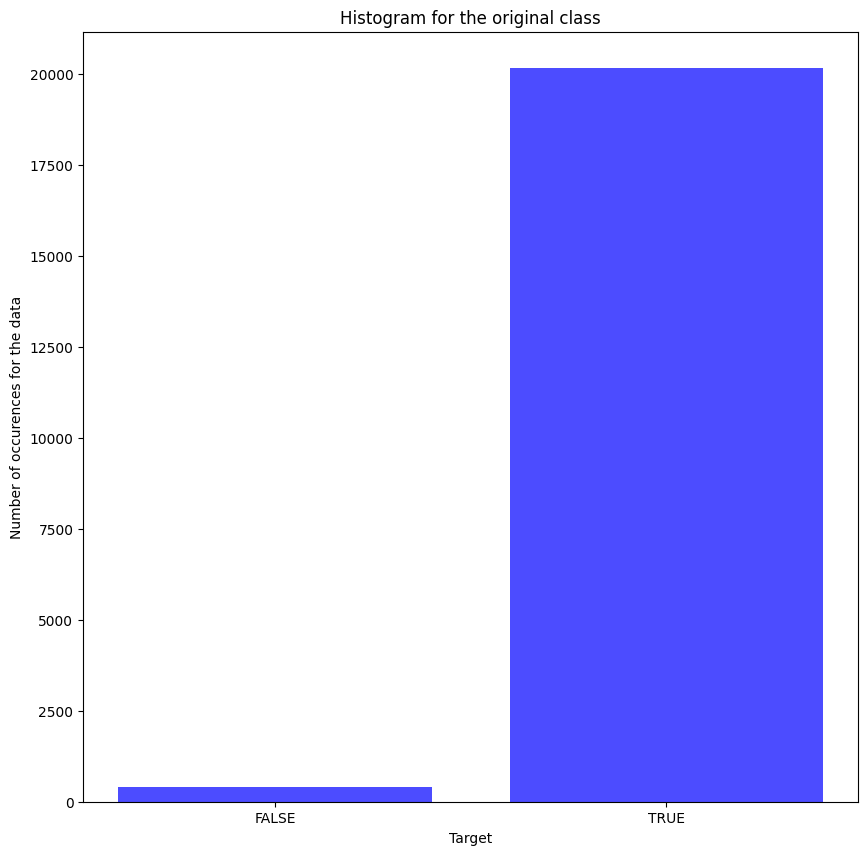

In [383]:
plt.figure(figsize=(10, 10))
plt.hist(target_enn, bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram for the original class')
plt.xlabel('Target')
plt.ylabel('Number of occurences for the data')
plt.xticks(range(2), ['FALSE', 'TRUE'])
plt.show()

In [384]:
#instantiating the smoteen

In [385]:
smotenn = SMOTEENN()
smotenn

SMOTEENN()

In [386]:
feat_smote_enn, target_smote_enn =smotenn.fit_resample(features_enn, target_enn)

In [387]:
# visualizing after resampling

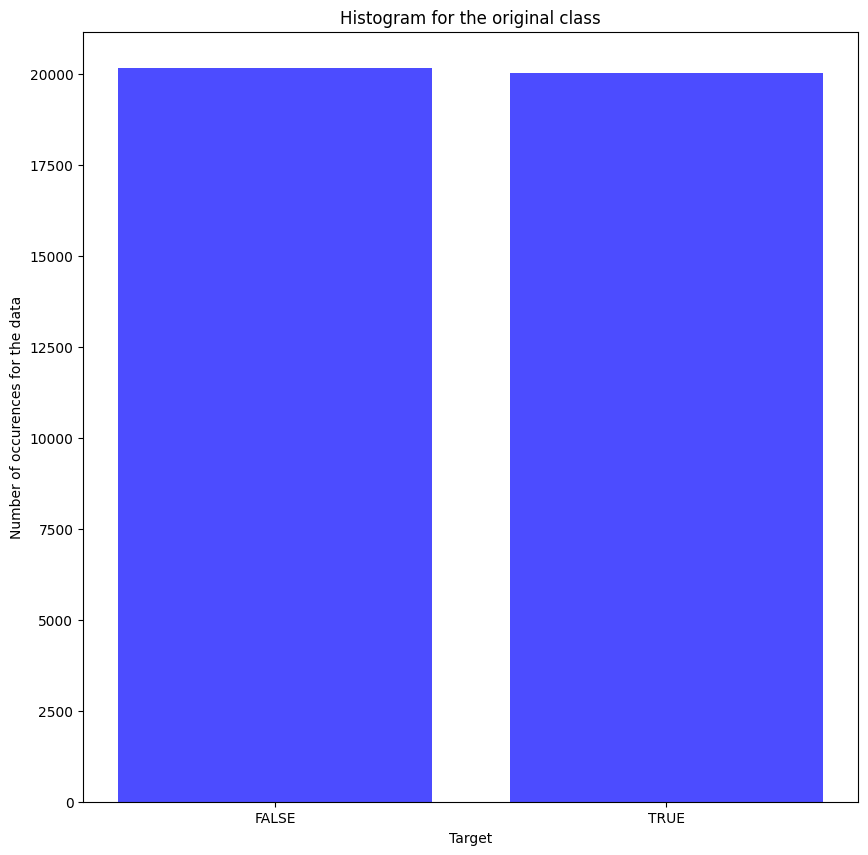

In [388]:
plt.figure(figsize=(10, 10))
plt.hist(target_smote_enn, bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram for the original class')
plt.xlabel('Target')
plt.ylabel('Number of occurences for the data')
plt.xticks(range(2), ['FALSE', 'TRUE'])
plt.show()

In [389]:
target_smote_enn.value_counts()

Flood
0.0      20145
1.0      20025
Name: count, dtype: int64

In [390]:
# concatenating my smoteen processed dataset

In [391]:
smoteen_df = pd.concat([feat_smote_enn, target_smote_enn],axis=1)
smoteen_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,0.335302,0.335818,0.199542,0.276628,0.022642,0.275584,0.029684,0.116899,0.241789,0.353455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.347405,0.382734,0.152069,0.197484,0.000000,0.230856,0.034173,0.072671,0.253996,0.366213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.383002,0.000000,0.155595,0.185672,0.003004,0.256855,0.029637,0.057774,0.279128,0.397009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.377353,0.037164,0.178850,0.192266,0.009865,0.214133,0.040150,0.051747,0.330756,0.391153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.335519,0.297392,0.219061,0.308708,0.032278,0.271167,0.029208,0.138030,0.254435,0.347789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
# train test split

In [393]:
smoteen_df_array = smoteen_df.values
smoteen_df_array

array([[0.3353015 , 0.33581815, 0.19954194, ..., 0.        , 0.        ,
        0.        ],
       [0.34740506, 0.38273439, 0.15206857, ..., 0.        , 0.        ,
        0.        ],
       [0.38300239, 0.        , 0.15559472, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3517315 , 0.28778032, 0.18057644, ..., 0.        , 1.        ,
        1.        ],
       [0.35868935, 0.32608123, 0.1745408 , ..., 0.        , 1.        ,
        1.        ],
       [0.36546501, 0.36546501, 0.13541784, ..., 0.        , 1.        ,
        1.        ]])

In [394]:
X = smoteen_df_array[:, :-1]
y = smoteen_df_array[:, -1]

In [395]:
from sklearn.model_selection import train_test_split
seed = 42
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [396]:
# importing my library

In [397]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [398]:
n_estimators = 100
rf_model = RandomForestClassifier(n_estimators = n_estimators,random_state=seed)
rf_model

RandomForestClassifier(random_state=42)

In [399]:
log_model =LogisticRegression()
log_model

LogisticRegression()

In [400]:
svc_model = SVC(probability=True)
svc_model

SVC(probability=True)

In [401]:
dec_model = DecisionTreeClassifier()
dec_model

DecisionTreeClassifier()

In [402]:
# fitting  model

In [403]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [404]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [405]:
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [406]:
dec_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [407]:
# predicting my model

In [408]:
y_r_pred = rf_model.predict(X_test)

In [409]:
y_l_pred = log_model.predict(X_test)

In [410]:
y_sv_pred = svc_model.predict(X_test)

In [411]:
y_de_pred = dec_model.predict(X_test)

In [412]:
# Ground Truth

In [413]:
y_test

array([0., 0., 1., ..., 0., 1., 1.])

In [414]:
# scoring my model

In [415]:
rf_score = rf_model.score(X_test, y_test)
rf_score

1.0

In [416]:
log_score = log_model.score(X_test, y_test)
log_score 

0.9835698282300224

In [417]:
sv_score = svc_model.score(X_test, y_test)
sv_score

0.9930296240975852

In [418]:
dec_score = dec_model.score(X_test, y_test)
dec_score

0.9992531740104555

### <font color = 'Purple'>Inference

- Random Forest Model on smotenn gave me a 99.9%
- Logistics Regression Model on smotenn gave me a 98.0%
- Support Vector Model on smotenn gave me a 99.0%
- Decision Tree Model on smotenn gave me a 99.8%

#### <font color = 'Purple'> testing other metrics on the model

The confusion matrix

In [419]:
# Logistics model

In [420]:
log_model

LogisticRegression()

In [421]:
#import the library

In [422]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, roc_auc_score

In [423]:
# plotting then confusion matrix

In [424]:
conf_mat_l = confusion_matrix(y_l_pred,y_test)
conf_mat_l

array([[2027,   56],
       [  10, 1924]], dtype=int64)

In [425]:
# plotting the graph

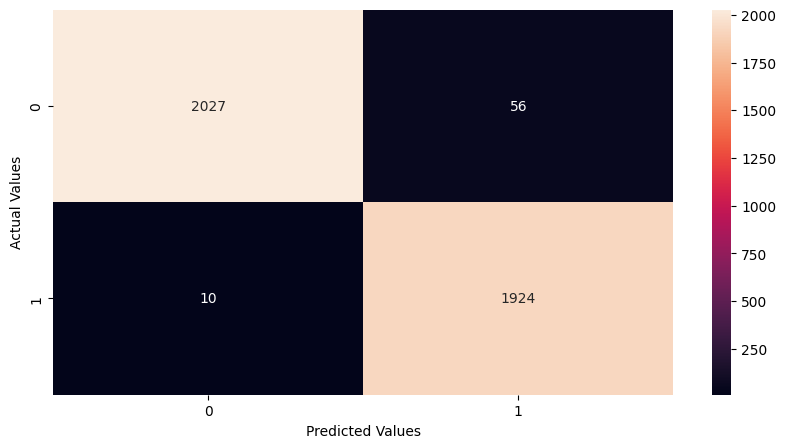

In [426]:
plt.figure(figsize=(10,5))
sb.heatmap(conf_mat_l,annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### <font color = 'Purple'>interpreting my confusion matrix for the log model
-  The upper left quadrant (True positive:): Indicated the class where there was no rain represented by  0 and the model predicted that class as 0 too. There were  2034 entries to agree to this assertion
 
- The lower left quadrant (False negative:):Indicated the class where there was  rain represented by  1 and the model predicted that class as 0    There were 17 entries in this quadrant, Hence it is making wrong prediction

 
- The upper right quadrant(False positive) :Indicated the class where there was no rain represented by  0 and the model predicted that class as 0. there were 51 entries in this quadrant
  
- The lower right quadrant( True negative) :Indicated the class where there was  rain represeted by  1 and the model predicted that class as 1.  there ,there were  1916 entries agree to this assertion

- 
this model did not predicted the 0 class correctly it missed 17 instances and  when predicting the 1-clas,it missed 51 instances

In [427]:
# accuracy score

In [428]:
acc_l_score = accuracy_score(y_l_pred,y_test)
acc_l_score 

0.9835698282300224

In [429]:
#precision score

In [430]:
pre_l_score = precision_score(y_l_pred,y_test)
pre_l_score 

0.9717171717171718

In [431]:
# recall score

In [432]:
recall_score =  recall_score(y_l_pred,y_test)
recall_score

0.9948293691830403

In [433]:
# f1 score

In [434]:
f1_l_score =  f1_score(y_l_pred,y_test)
f1_l_score

0.9831374552887072

In [435]:
# Auc score

In [438]:
probs_l = log_model.predict_proba(X_test)
probs_l


array([[7.03013906e-01, 2.96986094e-01],
       [9.98597504e-01, 1.40249613e-03],
       [1.25952028e-03, 9.98740480e-01],
       ...,
       [9.93297820e-01, 6.70217993e-03],
       [2.15072651e-04, 9.99784927e-01],
       [3.54883860e-04, 9.99645116e-01]])

In [439]:
fpr,tpr,thresholds = roc_curve(y_test,probs_l[:,1])
auc_score_l= roc_auc_score(y_test,probs_l[:,1])

In [440]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.90918017e-04,
       4.90918017e-04, 9.81836033e-04, 9.81836033e-04, 1.47275405e-03,
       1.47275405e-03, 1.96367207e-03, 1.96367207e-03, 2.45459008e-03,
       2.45459008e-03, 3.43642612e-03, 3.43642612e-03, 4.90918017e-03,
       4.90918017e-03, 5.89101620e-03, 5.89101620e-03, 7.36377025e-03,
       7.36377025e-03, 7.85468827e-03, 7.85468827e-03, 8.83652430e-03,
       8.83652430e-03, 1.08001964e-02, 1.08001964e-02, 1.12911144e-02,
       1.12911144e-02, 1.27638684e-02, 1.27638684e-02, 1.32547865e-02,
       1.32547865e-02, 1.76730486e-02, 1.76730486e-02, 2.40549828e-02,
       2.40549828e-02, 2.45459008e-02, 2.45459008e-02, 2.79823270e-02,
       2.79823270e-02, 3.04369170e-02, 3.04369170e-02, 3.78006873e-02,
       3.78006873e-02, 4.36917035e-02, 4.36917035e-02, 5.00736377e-02,
       5.00736377e-02, 5.44918999e-02, 5.44918999e-02, 5.64555719e-02,
       5.64555719e-02, 5.79283260e-02, 5.79283260e-02, 5.84192440e-02,
      

In [441]:
tpr

array([0.00000000e+00, 5.05050505e-04, 9.61616162e-01, 9.61616162e-01,
       9.62121212e-01, 9.62121212e-01, 9.62626263e-01, 9.62626263e-01,
       9.63636364e-01, 9.63636364e-01, 9.68686869e-01, 9.68686869e-01,
       9.70707071e-01, 9.70707071e-01, 9.71717172e-01, 9.71717172e-01,
       9.72222222e-01, 9.72222222e-01, 9.74747475e-01, 9.74747475e-01,
       9.75252525e-01, 9.75252525e-01, 9.75757576e-01, 9.75757576e-01,
       9.77272727e-01, 9.77272727e-01, 9.78282828e-01, 9.78282828e-01,
       9.79292929e-01, 9.79292929e-01, 9.79797980e-01, 9.79797980e-01,
       9.80303030e-01, 9.80303030e-01, 9.81313131e-01, 9.81313131e-01,
       9.81818182e-01, 9.81818182e-01, 9.82828283e-01, 9.82828283e-01,
       9.83838384e-01, 9.83838384e-01, 9.84343434e-01, 9.84343434e-01,
       9.84848485e-01, 9.84848485e-01, 9.85353535e-01, 9.85353535e-01,
       9.86363636e-01, 9.86363636e-01, 9.86868687e-01, 9.86868687e-01,
       9.87878788e-01, 9.87878788e-01, 9.88383838e-01, 9.88383838e-01,
      

In [442]:
thresholds

array([           inf, 9.99999963e-01, 7.43992104e-01, 7.39852858e-01,
       7.29431196e-01, 7.24816712e-01, 7.11516876e-01, 7.09881297e-01,
       6.93615381e-01, 6.68860917e-01, 5.86466161e-01, 5.81241224e-01,
       5.64370804e-01, 5.52682465e-01, 5.45859799e-01, 5.00161900e-01,
       4.91901764e-01, 4.69097337e-01, 4.12518006e-01, 4.04190276e-01,
       3.99696612e-01, 3.92492310e-01, 3.91499887e-01, 3.74999468e-01,
       3.50871991e-01, 3.38096656e-01, 3.35066884e-01, 3.28669810e-01,
       3.24534670e-01, 3.18781235e-01, 3.12759962e-01, 3.10996340e-01,
       3.10797027e-01, 2.99613546e-01, 2.98746401e-01, 2.79324448e-01,
       2.79301634e-01, 2.75028378e-01, 2.71021664e-01, 2.64872670e-01,
       2.60888636e-01, 2.60177709e-01, 2.59530576e-01, 2.45558288e-01,
       2.43873312e-01, 2.18684198e-01, 2.17058186e-01, 2.00316411e-01,
       1.96111432e-01, 1.81906628e-01, 1.75734687e-01, 1.62854707e-01,
       1.58986042e-01, 1.55111101e-01, 1.53028443e-01, 1.52933781e-01,
      

In [443]:
auc_score_l

0.9977514467205189

In [444]:
plt.plot(fpr,tpr,label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('AUC Curve on log reg model')
plt.legend(loc='lower right')
plt.show()

NameError: name 'auc_score' is not defined

### svc_model

In [ ]:
# confusion matrix

In [ ]:
conf_mat_s = confusion_matrix(y_sv_pred,y_test)
conf_mat_s

In [ ]:
plt.figure(figsize=(10,5))
sb.heatmap(conf_mat_s,annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### <font color = 'Purple'> interpreting my confusion matrix for svc model
-  The upper left quadrant (True positive:): Indicated the class where there was no rain represented by  0 and the model predicted that class as 0 too. There were  2047 entries to agree to this assertion
 
- The lower left quadrant (False negative:):Indicated the class where there was  rain represented by  1 and the model predicted that class as 0 .There were 4 entries in this quadrant, Hence it is making wrong prediction

 
- The upper right quadrant(False positive) :Indicated the class where there was no rain represented by  0 and the model predicted that class as 0. there were 21 entries in this quadrant
  
- The lower right quadrant( True negative) :Indicated the class where there was  rain represeted by  1 and the model predicted that class as 1.  there ,there were  1946 entries agree to this assertion

- 
this model did not predicted the 0 class correctly it missed 4 instances and  when predicting the 1-class,it missed 21 instances

In [ ]:
# accuracy score

In [ ]:
acc_s_score = accuracy_score(y_sv_pred,y_test)
acc_s_score 

In [ ]:
# precision score

In [ ]:
pre_s_score = precision_score(y_sv_pred,y_test)
pre_s_score 

In [ ]:
# recall score

In [ ]:
recall_score =  recall_score(y_sv_pred,y_test)
recall_score

In [ ]:
#f1 score

In [ ]:
f1_score_s = f1_score(y_sv_pred,y_test)
f1_score_s

In [ ]:
# auc score

In [450]:
probs_s = svc_model.predict_proba(X_test)
probs_s

array([[9.61227789e-01, 3.87722110e-02],
       [9.99992580e-01, 7.41969566e-06],
       [5.09864954e-14, 1.00000000e+00],
       ...,
       [9.99999900e-01, 1.00000010e-07],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00]])

In [451]:
fpr,tpr,thresholds = roc_curve(y_test,probs_s[:,1])
auc_score_s = roc_auc_score(y_test,probs_s[:,1])

In [452]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.90918017e-04, 4.90918017e-04, 9.81836033e-04,
       9.81836033e-04, 1.47275405e-03, 1.47275405e-03, 1.96367207e-03,
       1.96367207e-03, 4.41826215e-03, 4.41826215e-03, 6.38193422e-03,
       6.38193422e-03, 2.60186549e-02, 2.60186549e-02, 8.78743250e-02,
       8.78743250e-02, 6.84339715e-01, 1.00000000e+00])

In [453]:
tpr

array([0.        , 0.72474747, 0.73585859, 0.73686869, 0.74090909,
       0.74191919, 0.74292929, 0.74393939, 0.97626263, 0.97626263,
       0.99090909, 0.99090909, 0.99191919, 0.99191919, 0.99545455,
       0.99545455, 0.9969697 , 0.9969697 , 0.9979798 , 0.9979798 ,
       0.9989899 , 0.9989899 , 0.99949495, 0.99949495, 1.        ,
       1.        , 1.        ])

In [454]:
thresholds

array([           inf, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.85540326e-01, 9.84486244e-01, 7.46238824e-01, 7.27635728e-01,
       6.73872656e-01, 6.58143001e-01, 3.80201330e-01, 3.77861655e-01,
       3.30093003e-01, 2.47069561e-01, 2.13683100e-01, 1.59779505e-01,
       1.34707283e-01, 4.96226813e-02, 4.86436755e-02, 1.07500845e-02,
       1.07373821e-02, 1.01182559e-07, 1.00000010e-07])

In [458]:
auc_score_s 

0.9999152050698442

In [459]:
# AUC Curve

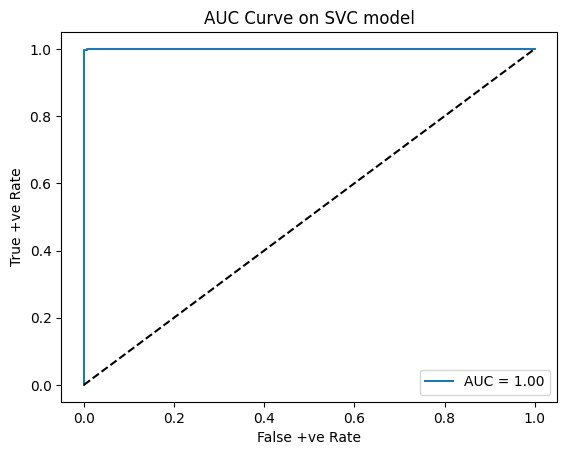

In [460]:
plt.plot(fpr,tpr,label='AUC = {:.2f}'.format(auc_score_s))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('AUC Curve on SVC model')
plt.legend(loc='lower right')
plt.show()

### <font color = 'Purple'>Dec_model

In [461]:
# confusion matrix

In [462]:
conf_mat_d = confusion_matrix(y_de_pred,y_test)
conf_mat_d

array([[2037,    3],
       [   0, 1977]], dtype=int64)

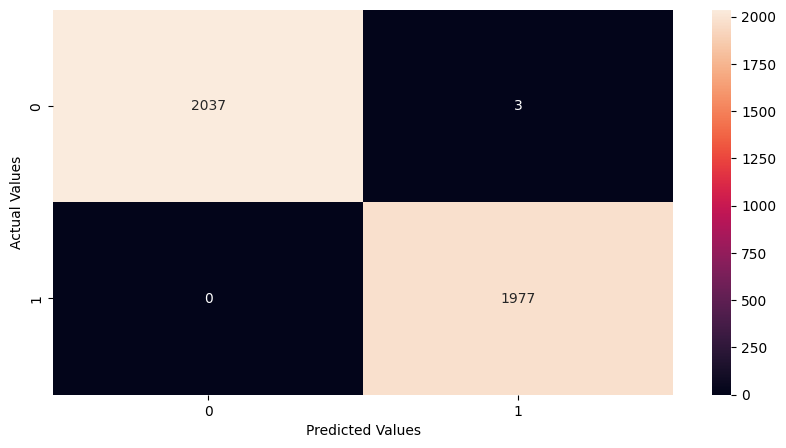

In [463]:
plt.figure(figsize=(10,5))
sb.heatmap(conf_mat_d,annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### <font color = 'Purple'> interpreting confusion matrix for decision tree model
-  The upper left quadrant (True positive:): Indicated the class where there was no rain represented by  0 and the model predicted that class as 0 too. There were  2051 entries to agree to this assertion
 
- The lower left quadrant (False negative:):Indicated the class where there was  rain represented by  1 and the model predicted that class as 0 .There was no entries in this quadrant, Hence it is making wrong prediction

 
- The upper right quadrant(False positive) :Indicated the class where there was no rain represented by  0 and the model predicted that class as 0. there were 3 entries in this quadrant
  
- The lower right quadrant( True negative) :Indicated the class where there was  rain represeted by  1 and the model predicted that class as 1.  there ,there were  1964 entries agree to this assertion

- 
this model did  predict the 0 class correctly  and  when predicting the 1-class,it missed 3 instances

In [464]:
# accuracy score

In [465]:
acc_d_score = accuracy_score(y_de_pred,y_test)
acc_d_score 

0.9992531740104555

In [466]:
# precision  score

In [467]:
pre_d_score = precision_score(y_de_pred,y_test)
pre_d_score 

0.9984848484848485

In [468]:
# recall score

In [469]:
recall_score_d =  recall_score(y_de_pred,y_test)
recall_score_d 

TypeError: 'numpy.float64' object is not callable

In [ ]:
# f1 score

In [470]:
f1_score_d=  f1_score(y_de_pred,y_test)
f1_score_d 

0.9992418498862775

In [ ]:
# auc_score_

In [471]:
probs_d = dec_model.predict_proba(X_test)
probs_d

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [472]:
fpr,tpr,thresholds = roc_curve(y_test,probs_d[:,1])
auc_score_d = roc_auc_score(y_test,probs_d[:,1])

In [473]:
fpr

array([0., 0., 1.])

In [474]:
tpr 

array([0.        , 0.99848485, 1.        ])

In [475]:
thresholds 

array([inf,  1.,  0.])

In [476]:
auc_score_d

0.9992424242424243

In [477]:
#  AUC curve

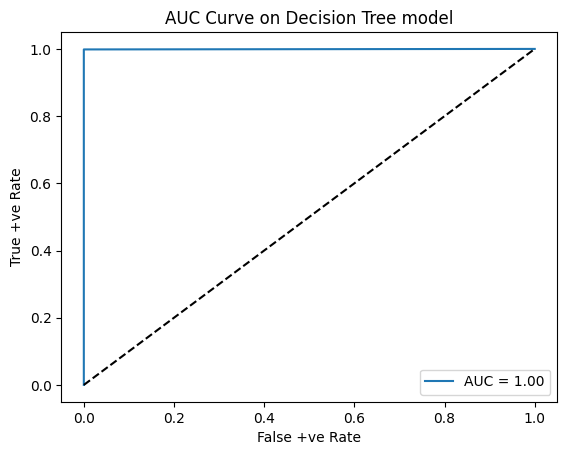

In [478]:
plt.plot(fpr,tpr,label='AUC = {:.2f}'.format(auc_score_d))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('AUC Curve on Decision Tree model')
plt.legend(loc='lower right')
plt.show()